In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

df = X
df["y"] = y

In [4]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['int64']).columns
numdf = df[numeric_columns]
scaler = StandardScaler()
norm_data = scaler.fit_transform(numdf)
normdf = pd.DataFrame(norm_data,columns=numdf.columns)
normdf.head(10)

,age,balance,day_of_week,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194
5,-0.559037,-0.371551,-1.298476,-0.462724,-0.569351,-0.411453,-0.25194
6,-1.218254,-0.300608,-1.298476,-0.159841,-0.569351,-0.411453,-0.25194
7,0.100181,-0.446762,-1.298476,0.473107,-0.569351,-0.411453,-0.25194
8,1.606965,-0.407679,-1.298476,-0.808322,-0.569351,-0.411453,-0.25194
9,0.194355,-0.252657,-1.298476,-0.788906,-0.569351,-0.411453,-0.25194


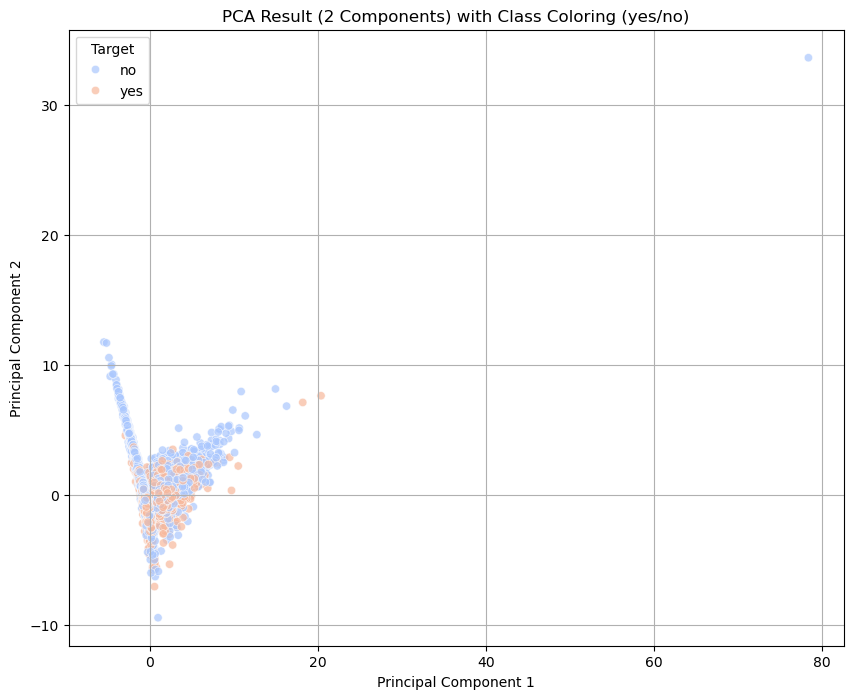

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(norm_data)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Afegir la columna de classe (df['y']) per a utilitzar-la com a color
pca_df['Target'] = df['y']

# Generar el gràfic 2D amb colors diferents per a les classes
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='coolwarm', alpha=0.7)
plt.title('PCA Result (2 Components) with Class Coloring (yes/no)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

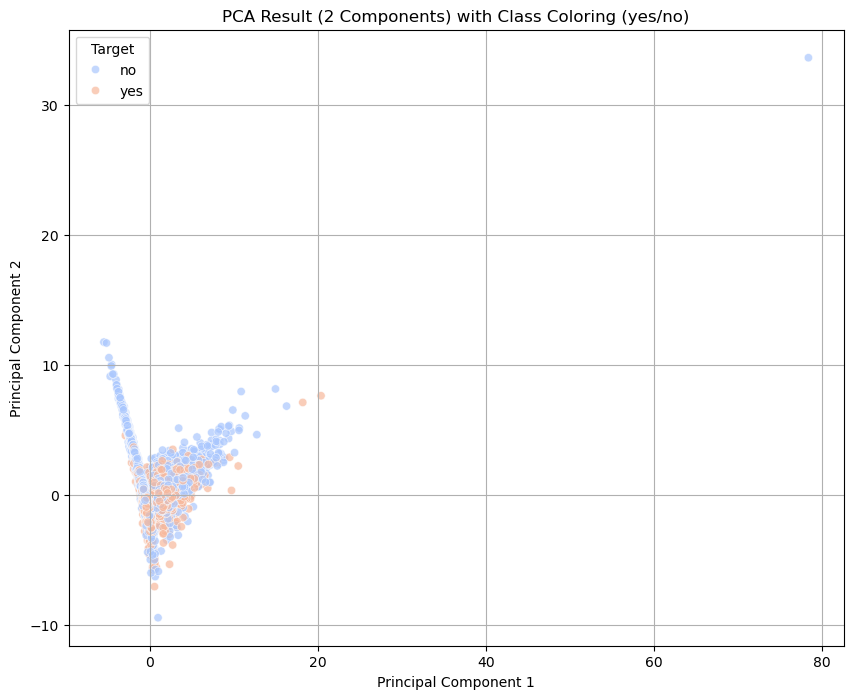

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(normdf)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Afegir la columna de classe (df['y']) per a utilitzar-la com a color
pca_df['Target'] = df['y']

# Generar el gràfic 2D amb colors diferents per a les classes
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='coolwarm', alpha=0.7)
plt.title('PCA Result (2 Components) with Class Coloring (yes/no)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()